In [1]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3633.868, Time=2.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3628.960, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3630.821, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3630.823, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3628.100, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3631.763, Time=0.58 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.770 seconds
Validation MSE: 2689.4076473214286
Testing MSE: 1182.6137121621623
Validation RMSE: 51.85949910403521
Testing RMSE: 34.38915108231319
Validation MAPE: 0.5223059626835749
Testing MAPE: 0.26621775445679724


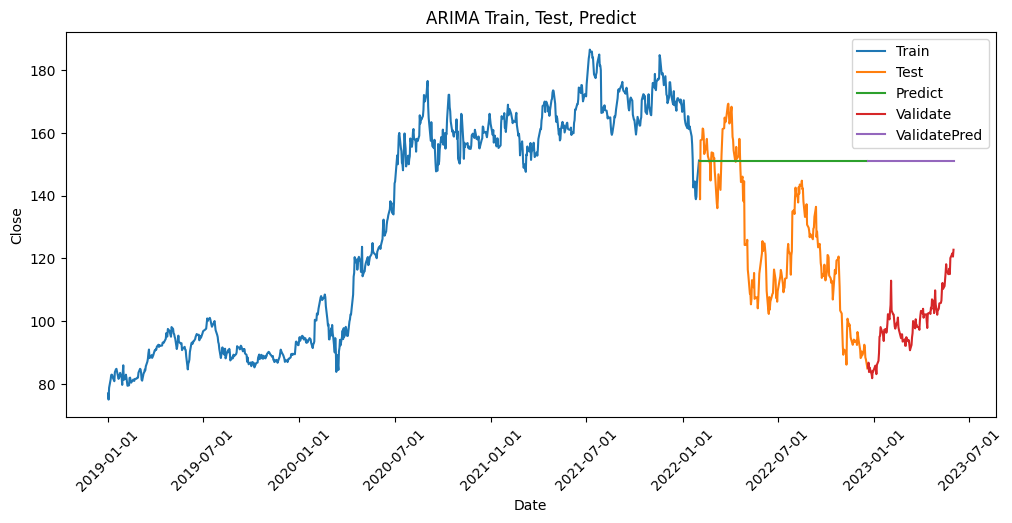

In [3]:
#AMZN 7:2:1

#Import thư viện
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


#chuyển đổi cột 'Date' sang định dạng thời gian, đặt cột 'Date' làm chỉ mục, chọn các cột 'Close' và 'Close-shop'
df = pd.read_csv('/content/AMZN (1).csv')
df.reset_index(drop=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df[['Close']]
df = df.dropna() # Drop missing values

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

# 8. Tính RMSE
valid_mse = np.mean((y_pred_val - y_val)**2)
test_mse = np.mean((y_pred - y_test)**2)
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 9.Vẽ hình
plt.figure(figsize=(12,5), dpi=100)
plt.ylabel('Close');
plt.xlabel('Date');
plt.title('ARIMA Train, Test, Predict')
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_val)
plt.plot(val_data.index, y_pred_val)
plt.legend(['Train', 'Test', 'Predict','Validate','ValidatePred'])

# Định dạng trục x để hiển thị cả ngày, tháng và năm
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3091.167, Time=1.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3087.797, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3088.804, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3088.813, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3087.745, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3089.325, Time=0.50 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.514 seconds
Validation MSE: 4328.479772321428
Testing MSE: 1444.2857669669665
Validation RMSE: 65.79118308954041
Testing RMSE: 38.003759905658896
Validation MAPE: 0.6642764241812824
Testing MAPE: 0.25927645763989443


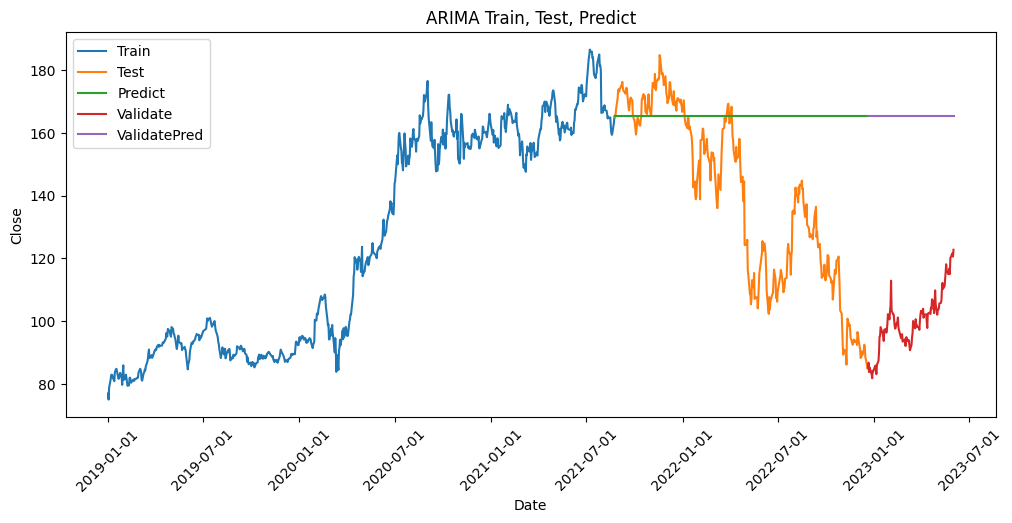

In [4]:
#AMZN 6:3:1

#Import thư viện
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


#chuyển đổi cột 'Date' sang định dạng thời gian, đặt cột 'Date' làm chỉ mục, chọn các cột 'Close' và 'Close-shop'
df = pd.read_csv('/content/AMZN (1).csv')
df.reset_index(drop=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df[['Close']]
df = df.dropna() # Drop missing values

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

# 8. Tính RMSE
valid_mse = np.mean((y_pred_val - y_val)**2)
test_mse = np.mean((y_pred - y_test)**2)
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 9.Vẽ hình
plt.figure(figsize=(12,5), dpi=100)
plt.ylabel('Close');
plt.xlabel('Date');
plt.title('ARIMA Train, Test, Predict')
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_val)
plt.plot(val_data.index, y_pred_val)
plt.legend(['Train', 'Test', 'Predict','Validate','ValidatePred'])

# Định dạng trục x để hiển thị cả ngày, tháng và năm
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3091.167, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3087.797, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3088.804, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3088.813, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3087.745, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3089.325, Time=0.45 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.876 seconds
Validation MSE: 3595.44688251121
Testing MSE: 738.5236040540537
Validation RMSE: 59.96204534963104
Testing RMSE: 27.17579077145785
Validation MAPE: 0.5702113136038182
Testing MAPE: 0.15126530166097746


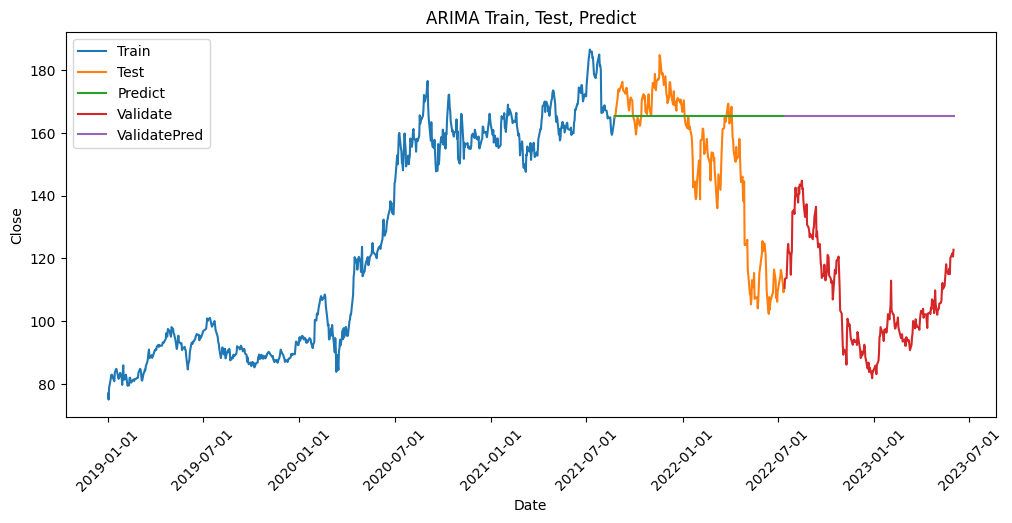

In [6]:
#AMZN 6:2:2

#Import thư viện
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


#chuyển đổi cột 'Date' sang định dạng thời gian, đặt cột 'Date' làm chỉ mục, chọn các cột 'Close' và 'Close-shop'
df = pd.read_csv('/content/AMZN (1).csv')
df.reset_index(drop=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df[['Close']]
df = df.dropna() # Drop missing values

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

# 8. Tính RMSE
valid_mse = np.mean((y_pred_val - y_val)**2)
test_mse = np.mean((y_pred - y_test)**2)
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 9.Vẽ hình
plt.figure(figsize=(12,5), dpi=100)
plt.ylabel('Close');
plt.xlabel('Date');
plt.title('ARIMA Train, Test, Predict')
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_val)
plt.plot(val_data.index, y_pred_val)
plt.legend(['Train', 'Test', 'Predict','Validate','ValidatePred'])

# Định dạng trục x để hiển thị cả ngày, tháng và năm
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4715.501, Time=2.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4720.416, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4719.607, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4719.870, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4718.420, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4718.748, Time=0.70 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4718.845, Time=0.56 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4719.293, Time=4.50 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4719.480, Time=4.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4717.487, Time=0.58 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4719.316, Time=0.78 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4719.895, Time=1.13 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4718.860, Time=3.17 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=4713.505, Time=1.11 sec
 ARIMA(1,1,2)(0,0,0)[0]          

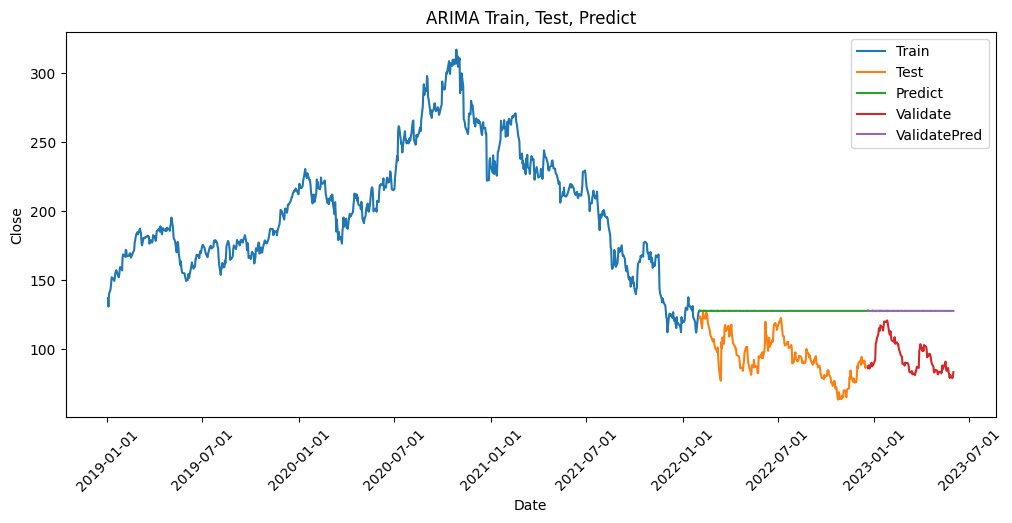

In [8]:
#BABA 7:2:1

#Import thư viện
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


#chuyển đổi cột 'Date' sang định dạng thời gian, đặt cột 'Date' làm chỉ mục, chọn các cột 'Close'
df = pd.read_csv('/content/BABA.csv')
df.reset_index(drop=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df[['Close']]
df = df.dropna() # Drop missing values

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

# 8. Tính RMSE
valid_mse = np.mean((y_pred_val - y_val)**2)
test_mse = np.mean((y_pred - y_test)**2)
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 9.Vẽ hình
plt.figure(figsize=(12,5), dpi=100)
plt.ylabel('Close');
plt.xlabel('Date');
plt.title('ARIMA Train, Test, Predict')
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_val)
plt.plot(val_data.index, y_pred_val)
plt.legend(['Train', 'Test', 'Predict','Validate','ValidatePred'])

# Định dạng trục x để hiển thị cả ngày, tháng và năm
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4054.985, Time=1.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4060.924, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4060.205, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4060.438, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4058.995, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4059.426, Time=0.62 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4059.557, Time=0.47 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4056.004, Time=1.42 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4056.253, Time=1.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4058.136, Time=0.36 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4058.468, Time=0.89 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4059.732, Time=1.16 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4058.454, Time=2.05 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=4053.055, Time=1.03 sec
 ARIMA(1,1,2)(0,0,0)[0]          

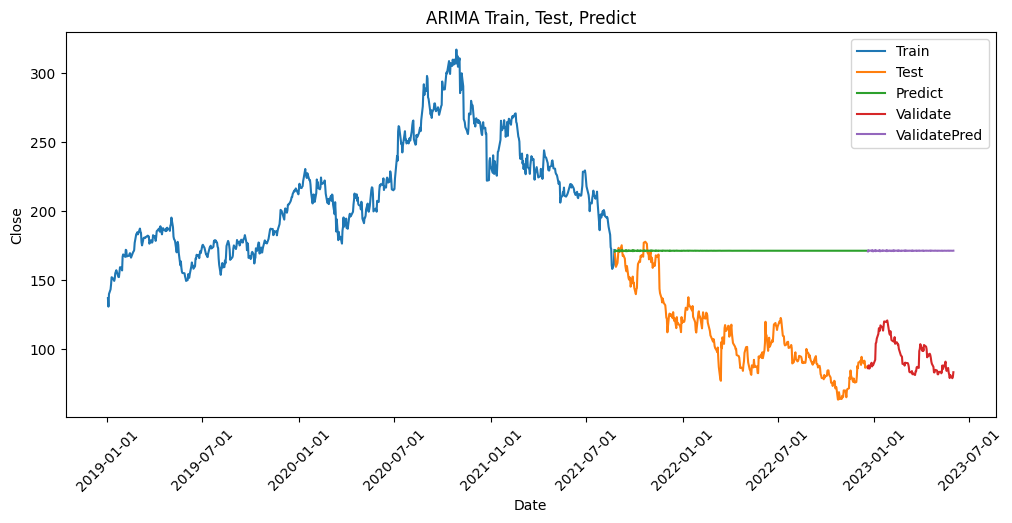

In [9]:
#BABA 6:3:1

#Import thư viện
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


#chuyển đổi cột 'Date' sang định dạng thời gian, đặt cột 'Date' làm chỉ mục, chọn các cột 'Close' và 'Close-shop'
df = pd.read_csv('/content/BABA.csv')
df.reset_index(drop=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df[['Close']]
df = df.dropna() # Drop missing values

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

# 8. Tính RMSE
valid_mse = np.mean((y_pred_val - y_val)**2)
test_mse = np.mean((y_pred - y_test)**2)
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 9.Vẽ hình
plt.figure(figsize=(12,5), dpi=100)
plt.ylabel('Close');
plt.xlabel('Date');
plt.title('ARIMA Train, Test, Predict')
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_val)
plt.plot(val_data.index, y_pred_val)
plt.legend(['Train', 'Test', 'Predict','Validate','ValidatePred'])

# Định dạng trục x để hiển thị cả ngày, tháng và năm
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4054.985, Time=1.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4060.924, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4060.205, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4060.438, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4058.995, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4059.426, Time=0.60 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4059.557, Time=0.48 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4056.004, Time=1.41 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4056.253, Time=1.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4058.136, Time=0.36 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4058.468, Time=0.45 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4059.732, Time=0.95 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4058.454, Time=2.66 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=4053.055, Time=0.76 sec
 ARIMA(1,1,2)(0,0,0)[0]          

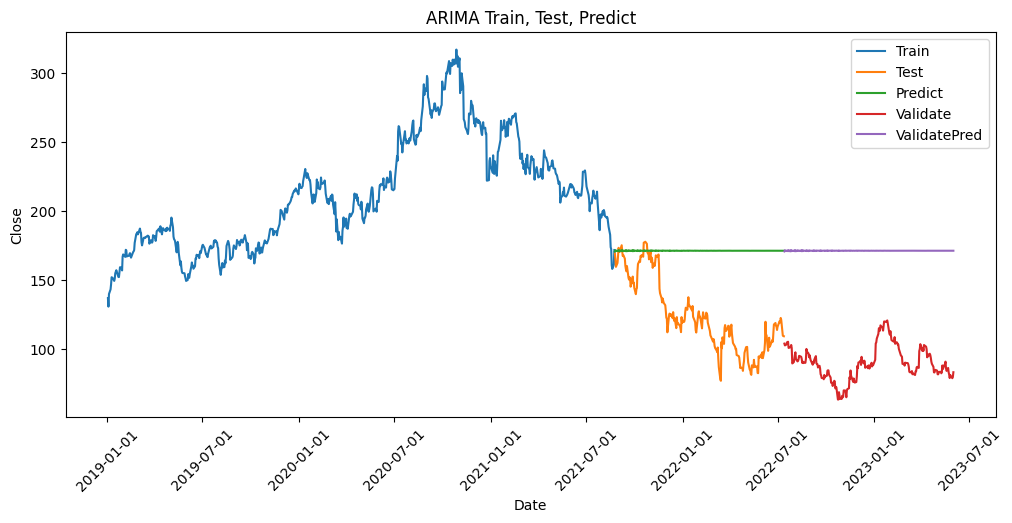

In [10]:
#BABA 6:2:2

#Import thư viện
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


#chuyển đổi cột 'Date' sang định dạng thời gian, đặt cột 'Date' làm chỉ mục, chọn các cột 'Close' và 'Close-shop'
df = pd.read_csv('/content/BABA.csv')
df.reset_index(drop=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df[['Close']]
df = df.dropna() # Drop missing values

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

# 8. Tính RMSE
valid_mse = np.mean((y_pred_val - y_val)**2)
test_mse = np.mean((y_pred - y_test)**2)
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 9.Vẽ hình
plt.figure(figsize=(12,5), dpi=100)
plt.ylabel('Close');
plt.xlabel('Date');
plt.title('ARIMA Train, Test, Predict')
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_val)
plt.plot(val_data.index, y_pred_val)
plt.legend(['Train', 'Test', 'Predict','Validate','ValidatePred'])

# Định dạng trục x để hiển thị cả ngày, tháng và năm
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2226.012, Time=2.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2218.185, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2220.055, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2220.054, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2217.470, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2222.042, Time=0.18 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.615 seconds
Validation MSE: 208.3259476111863
Testing MSE: 193.16934568293559
Validation RMSE: 14.433500878552865
Testing RMSE: 13.898537537558964
Validation MAPE: 0.32373915074580967
Testing MAPE: 0.29362493300280373


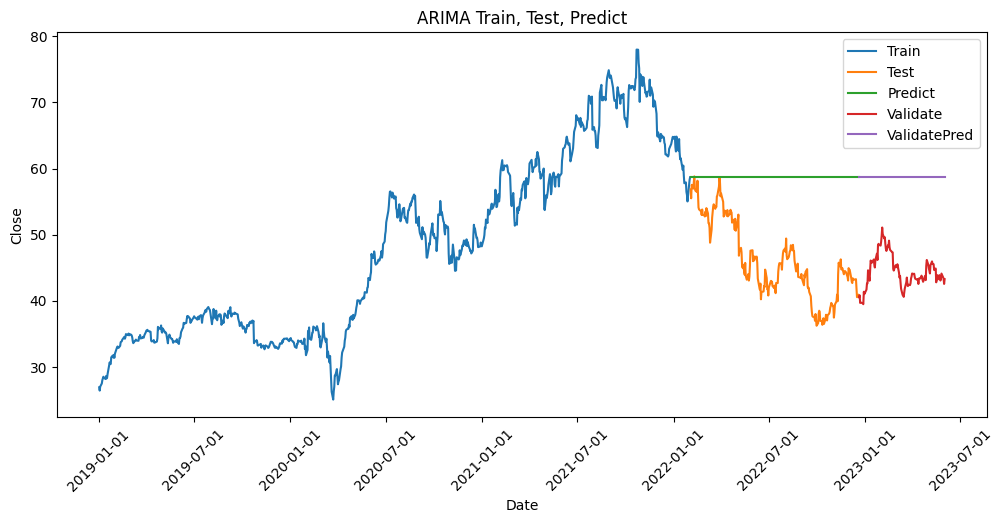

In [11]:
#EBAY 7:2:1

#Import thư viện
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


#chuyển đổi cột 'Date' sang định dạng thời gian, đặt cột 'Date' làm chỉ mục, chọn các cột 'Close' và 'Close-shop'
df = pd.read_csv('/content/EBAY.csv')
df.reset_index(drop=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df[['Close']]
df = df.dropna() # Drop missing values

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

# 8. Tính RMSE
valid_mse = np.mean((y_pred_val - y_val)**2)
test_mse = np.mean((y_pred - y_test)**2)
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 9.Vẽ hình
plt.figure(figsize=(12,5), dpi=100)
plt.ylabel('Close');
plt.xlabel('Date');
plt.title('ARIMA Train, Test, Predict')
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_val)
plt.plot(val_data.index, y_pred_val)
plt.legend(['Train', 'Test', 'Predict','Validate','ValidatePred'])

# Định dạng trục x để hiển thị cả ngày, tháng và năm
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1816.093, Time=1.96 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1815.319, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1816.847, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1816.845, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1816.501, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1818.845, Time=0.32 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 2.630 seconds
Validation MSE: 885.4300064935627
Testing MSE: 1091.2497278332978
Validation RMSE: 29.75617593867805
Testing RMSE: 33.03406919883316
Validation MAPE: 0.6699103816484807
Testing MAPE: 0.6222362622102822


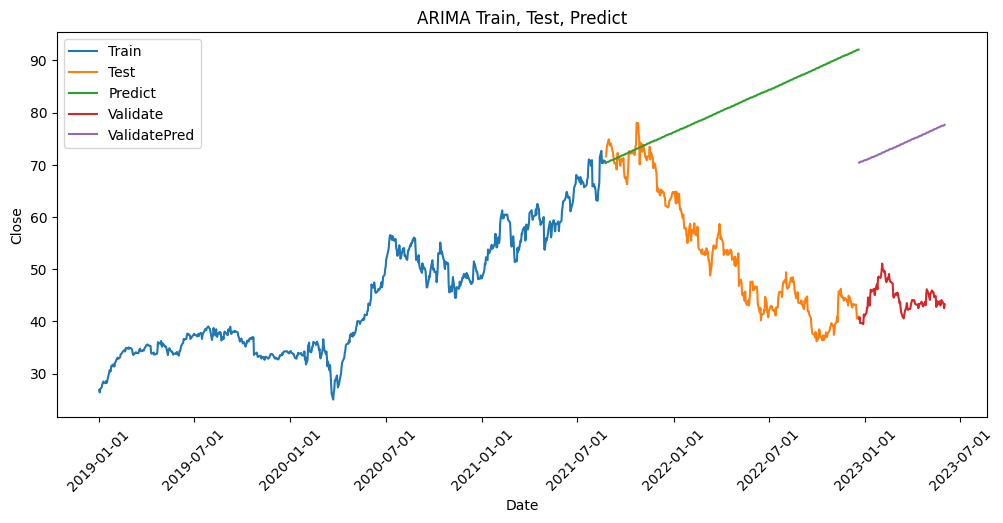

In [12]:
#EBAY 6:3:1

#Import thư viện
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


#chuyển đổi cột 'Date' sang định dạng thời gian, đặt cột 'Date' làm chỉ mục, chọn các cột 'Close' và 'Close-shop'
df = pd.read_csv('/content/EBAY.csv')
df.reset_index(drop=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df[['Close']]
df = df.dropna() # Drop missing values

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

# 8. Tính RMSE
valid_mse = np.mean((y_pred_val - y_val)**2)
test_mse = np.mean((y_pred - y_test)**2)
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 9.Vẽ hình
plt.figure(figsize=(12,5), dpi=100)
plt.ylabel('Close');
plt.xlabel('Date');
plt.title('ARIMA Train, Test, Predict')
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_val)
plt.plot(val_data.index, y_pred_val)
plt.legend(['Train', 'Test', 'Predict','Validate','ValidatePred'])

# Định dạng trục x để hiển thị cả ngày, tháng và năm
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1816.093, Time=1.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1815.319, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1816.847, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1816.845, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1816.501, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1818.845, Time=0.33 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.836 seconds
Validation MSE: 1194.1769538521892
Testing MSE: 563.9176126349271
Validation RMSE: 34.55686550965219
Testing RMSE: 23.746949543781977
Validation MAPE: 0.7965315091690396
Testing MAPE: 0.3815530121440741


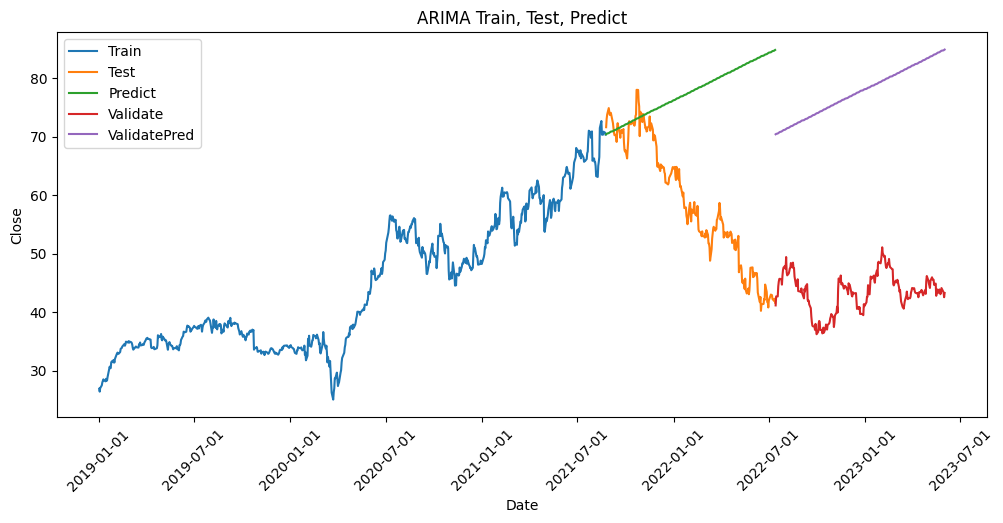

In [13]:
#EBAY 6:2:2

#Import thư viện
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


#chuyển đổi cột 'Date' sang định dạng thời gian, đặt cột 'Date' làm chỉ mục, chọn các cột 'Close' và 'Close-shop'
df = pd.read_csv('/content/EBAY.csv')
df.reset_index(drop=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df[['Close']]
df = df.dropna() # Drop missing values

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

# 8. Tính RMSE
valid_mse = np.mean((y_pred_val - y_val)**2)
test_mse = np.mean((y_pred - y_test)**2)
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 9.Vẽ hình
plt.figure(figsize=(12,5), dpi=100)
plt.ylabel('Close');
plt.xlabel('Date');
plt.title('ARIMA Train, Test, Predict')
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_val)
plt.plot(val_data.index, y_pred_val)
plt.legend(['Train', 'Test', 'Predict','Validate','ValidatePred'])

# Định dạng trục x để hiển thị cả ngày, tháng và năm
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.show()